In [18]:
#Импортируем используемые библиотеки
import numpy as np
import pandas as pd
from IPython.core.display import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from IPython.display import Javascript
from itertools import combinations
from scipy.stats import ttest_ind
import warnings; warnings.simplefilter('ignore')

sns.set(style="whitegrid")
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [19]:
# читаем файл и смотрим типы данных 

In [20]:
df = pd.read_csv('stud_math.xls')
display(df.head(10))
df.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [21]:
# у нас в руках данные о 395 учениках. 
# сразу заметно, что не все столбцы заполненны
# некоторые столбцы числового типа, такие как traveltime или Medu не показывают нам количество, а скорее всего показывают
#информацию по уровням. Поэтому отнесем их к категориальным признакам

# определим выбросы в числовых столбцах 

In [22]:
def outliners():
  for column_name in df:
    column = df[column_name]
    if column.dtype in ['int64', 'float64']:
      IQR = column.quantile(0.75) - column.quantile(0.25)
      outliners = {
        "left_outliner": column.quantile(0.25) - 1.5 * IQR, 
        "right_outliner": column.quantile(0.75) + 1.5 * IQR
      }
      print(column_name, outliners)

In [23]:
outliners()

age {'left_outliner': 13.0, 'right_outliner': 21.0}
Medu {'left_outliner': -1.0, 'right_outliner': 7.0}
Fedu {'left_outliner': 0.5, 'right_outliner': 4.5}
traveltime {'left_outliner': -0.5, 'right_outliner': 3.5}
studytime {'left_outliner': -0.5, 'right_outliner': 3.5}
failures {'left_outliner': 0.0, 'right_outliner': 0.0}
studytime, granular {'left_outliner': -10.5, 'right_outliner': 1.5}
famrel {'left_outliner': 2.5, 'right_outliner': 6.5}
freetime {'left_outliner': 1.5, 'right_outliner': 5.5}
goout {'left_outliner': -1.0, 'right_outliner': 7.0}
health {'left_outliner': 0.0, 'right_outliner': 8.0}
absences {'left_outliner': -12.0, 'right_outliner': 20.0}
score {'left_outliner': -5.0, 'right_outliner': 115.0}


# создадим словарь значений для наших категориальных столбцов из описания датасета

In [24]:
dictionary = {
    "sex": {
        "title": "пол ученика",
        "values": {
          "F": 'женский',
          "M": "мужской"   
        }
    },
    "address": {
        "title": "тип адреса ученика",
        "values": {
          "U": "городской",
          "R": "за городом"   
        }
    },
    "famsize": {
        "title": "размер семьи",
        "values": {
          "LE3": "<= 3",
          "GT3": "> 3"
        }
    },
    "Pstatus": {
        "title": "статус совместного жилья родителей",
        "values": {
          "T": "вместе",
          "A": "раздельно"
        }
    },
    "Medu": {
        "title": "образование матери",
        "values": {
          "0.0": "0) нет",
          "1.0": "1) 4 кл",
          "2.0": "2) 5-9 кл",
          "3.0": "3) 11 кл / ср.сп.",
          "4.0": "4) высшее",
        }
    },
    "Fedu": {
        "title": "образование отца",
        "values": {
          "0.0": "0) нет",
          "1.0": "1) 4 кл",
          "2.0": "2) 5-9 кл",
          "3.0": "3) 11 кл / ср.сп.",
          "4.0": "4) высшее",
        }
    },
    "Fjob": {
        "title": "работа отца",
        "values": {
          "teacher": "учитель",
          "health": "сфера здравохранения",
          "services": "гос.служба",
          "at_home": "не работает",
          "other": ".другое",
        }
    },
    "Mjob": {
        "title": "работа матери",
        "values": {
          "teacher": "учитель",
          "health": "сфера здравохранения",
          "services": "гос.служба",
          "at_home": "не работает",
          "other": ".другое",
        }
    },
    "reason": {
        "title": "причина выбора школы",
        "values": {
          "home": "близость к дому",
          "reputation": "репутация",
          "course": "образовательная программа",
          "other": ".другое",
        }
    },
    "guardian": {
        "title": "опекун",
        "values": {
          "mother": "мать",
          "father": "отец",
          "other": "другое",
        }
    },
    "traveltime": {
        "title": "время в пути до школы",
        "values": {
          "1.0": "1) < 15 мин",
          "2.0": "2) 15-30 мин",
          "3.0": "3) 30-60 мин",
          "4.0": "4) > 60 мин",
        }
    },
    "studytime": {
        "title": "время на учёбу помимо школы в неделю",
        "values": {
          "1.0": "1) < 2 часов",
          "2.0": "2) 2-5 часов",
          "3.0": "3) 5-10 часов",
          "4.0": "4) > 10 часов",
        }
    },
    "studytime, granular": {
        "title": "studytime, granular",
        "values": {
          "1.0": "1) < 2 часов",
          "2.0": "2) 2-5 часов",
          "3.0": "3) 5-10 часов",
          "4.0": "4) > 10 часов",
        }
    },
    "failures": {
        "title": "количество внеучебных неудач",
        "values": {
          "1.0": "1",
          "2.0": "2",
          "3.0": "3",
          "0.0": "другое",}
    },
    "schoolsup": {
        "title": "дополнительная образовательная поддержка",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "famsup": {
        "title": "семейная образовательная поддержка",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "paid": {
        "title": "дополнительные платные занятия по математике",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "activities": {
        "title": "дополнительные внеучебные занятия",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "nursery": {
        "title": "посещал детский сад",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "higher": {
        "title": "хочет получить высшее образование",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "internet": {
        "title": "наличие интернета дома",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "romantic": {
        "title": "в романтических отношениях",
        "values": {
          "yes": "да",
          "no": "нет"
        }
    },
    "famrel": {
        "title": "семейные отношения",
        "values": {
          "1.0": "1) очень плохо",
          "2.0": "2) плохо",
          "3.0": "3) норм",
          "4.0": "4) хорошо",
          "5.0": "5) очень хорошо",
        }
    },
    "freetime": {
        "title": "свободное время после школы",
        "values": {
          "1.0": "1) очень мало",
          "2.0": "2) мало",
          "3.0": "3) норм",
          "4.0": "4) много",
          "5.0": "5) очень много",
        }
    },
    "goout": {
        "title": "проведение времени с друзьями",
        "values": {
          "1.0": "1) очень мало",
          "2.0": "2) мало",
          "3.0": "3) норм",
          "4.0": "4) много",
          "5.0": "5) очень много",
        }
    },
    "health": {
        "title": "текущее состояние здоровья",
        "values": {
          "1.0": "1) очень плохо",
          "2.0": "2) плохо",
          "3.0": "3) норм",
          "4.0": "4) хорошо",
          "5.0": "5) очень хорошо",
        }
    }
}

# Напишем функции по смене типа данных и заполнения пустых ячеек

In [61]:
#Функция замены значения в категориальных столбцах, для лучшего чтения диаграммы
def change_column(name, type):
  if name in list(dictionary.keys()):
    if type in ['float64', 'int64']:
      df[name] = df[name].astype(str)

# Проверка 
def orig_value(name, value):
  if name in list(dictionary.keys()):
    if value in list(dictionary[name]['values'].keys()):
      return dictionary[name]['values'][value]
  return value
  
# Функция заполнения пустых значений цифрой"-3", для отображения их на диграмме
def fill_value(type, value):
  if type == 'object':
    return '-'
  elif type in ['float64', 'int64']:
    return -3

# Функция замены или проверки типа данных
def check_value(name, type, value):
  if value != value or value == 'nan':
    return fill_value(type, value)
  else:
    return orig_value(name, value)


for column_name in df:
  change_column(column_name, df[column_name].dtype)
  df[column_name] = df[column_name].map(
      lambda value: check_value(column_name, df[column_name].dtype, value)
  )

# Построение гистограмм распределения

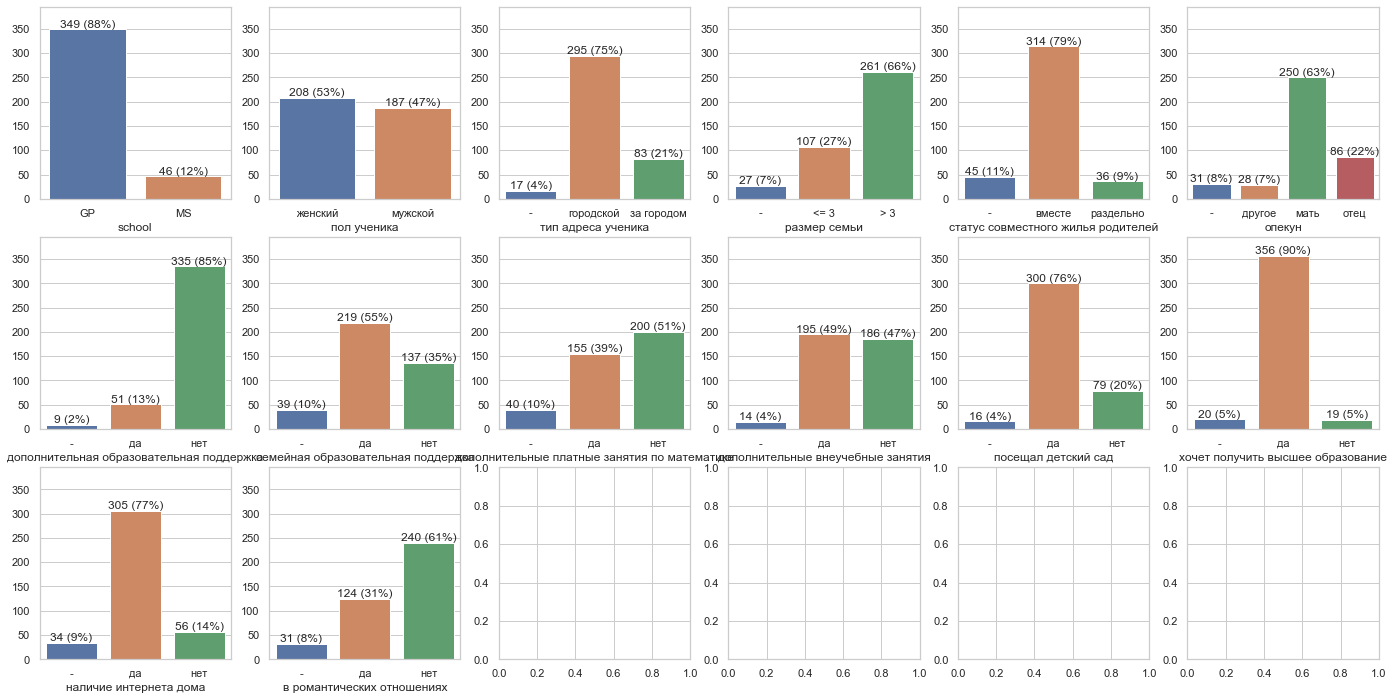

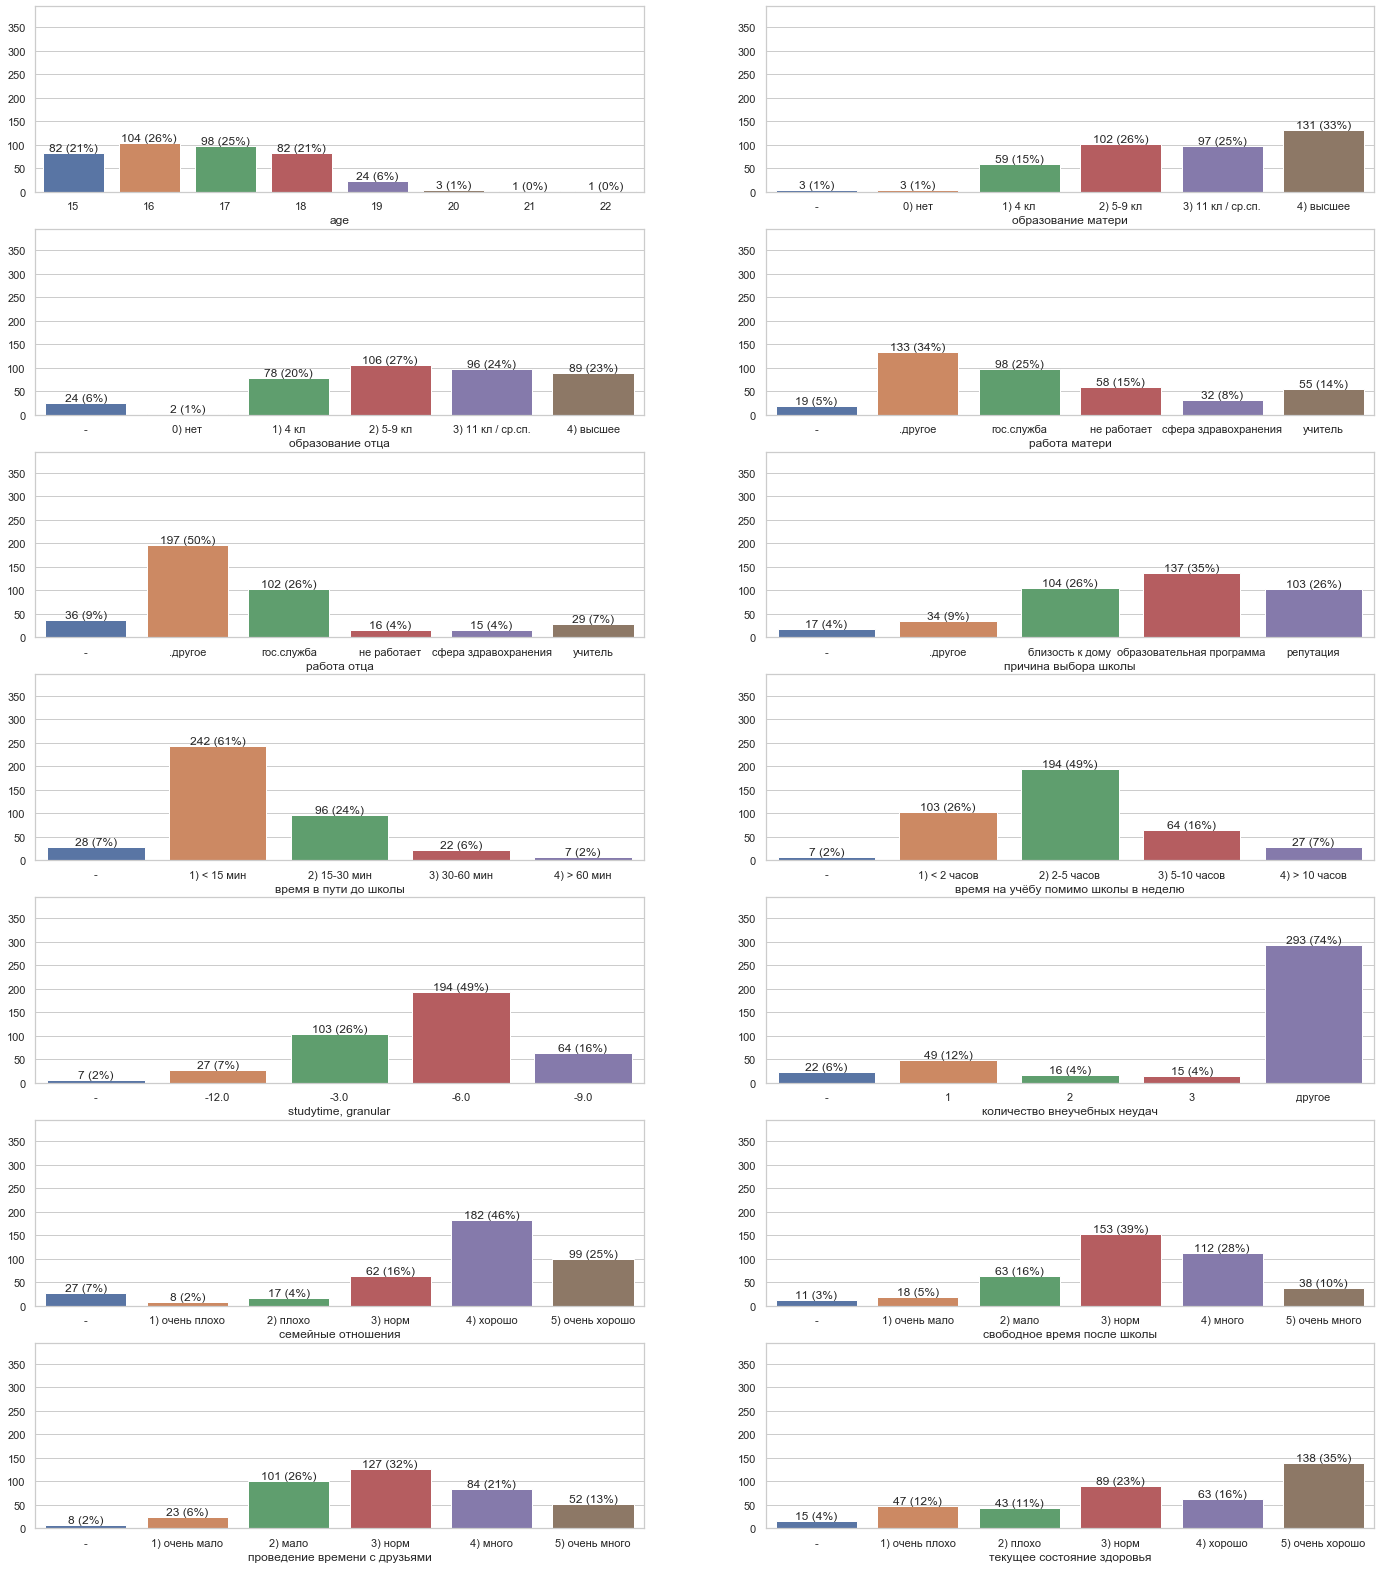

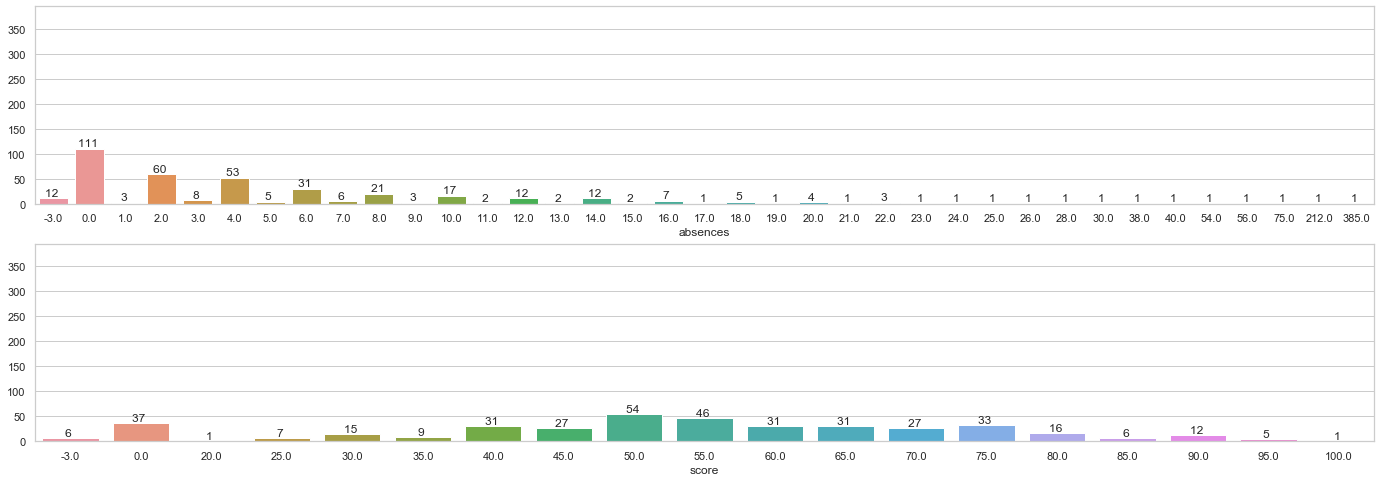

In [62]:
def show (df, columns, inrow = 2, percent = True):
  fig, axes = plt.subplots(
    math.ceil(len(columns)/inrow), 
    inrow, 
    figsize=(24, math.ceil(len(columns)/inrow) * 4)
  )

  for column in columns:
    if len(columns) > len(columns) / inrow:
      ax = axes[
        int(math.floor(columns.index(column) + 1) / inrow - 0.00000001),
        int(columns.index(column) % inrow)
      ]
    else:
      ax = axes[int(math.floor(columns.index(column) + 1) / inrow - 0.00000001)]

    df.sort_values(by = [column], inplace = True)
    countplot = sns.countplot(data = df, x = column, ax = ax)
  
    countplot.set(
      ylim=(0, len(df)),
      xlabel = dictionary[column]['title'] if column in list(dictionary.keys()) else column, 
      ylabel=''
    )
  
    for p in countplot.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        countplot.annotate(
            f'{int(y)} {f"({int(round(100*y/len(df), 0))}%)" if percent else ""}', 
            (x.mean(), y), 
            ha ='center', 
            va='bottom'
        )


show (df, ['school', 'sex', 'address', 'famsize', 'Pstatus', 
  'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 
  'higher', 'internet', 'romantic'], 6)

show (df, ['age', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 
  'traveltime', 'studytime', "studytime, granular", 'failures', 'famrel', 'freetime', 
  'goout', 'health'], 2)

show (df, ['absences', 'score'], 1, percent = False)

In [63]:
# по гистограммам видно, что в датасете больше учеников из школы GP, что они городские и у них есть интернет.

In [64]:
# в столбце "образование отца" отразилось значение "40", что скорее всего является опечаткой и должно быть 4. исправим это
df['Fedu'][df['Fedu'] == '40.0'] = dictionary['Fedu']['values']['4.0']

In [65]:
df['Fedu'].max()

'4) высшее'

In [66]:
# в столбце "семейные отношения" отразилось значение "-1", что скорее всего является опечаткой и должно быть 1. исправим это
df['famrel'][df['famrel'] == '-1.0'] = dictionary['famrel']['values']['1.0']

# рассмотрим корреляцию количественных значений

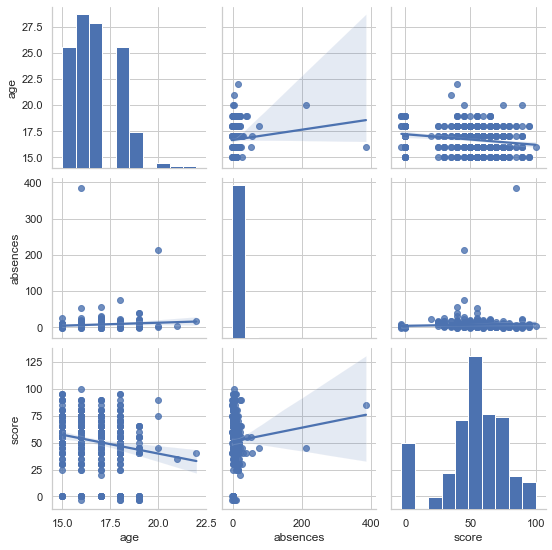

In [67]:
sns.pairplot (df, kind ='reg')

In [68]:
# глядя на корреляцию явно заметна связь "возраст" и "пропуски" с "баллы по госэкзамену по математике"

In [69]:
#проверим выбросы после работы с данными в столбцах
outliners()

age {'left_outliner': 13.0, 'right_outliner': 21.0}
absences {'left_outliner': -12.0, 'right_outliner': 20.0}
score {'left_outliner': -5.0, 'right_outliner': 115.0}


# Анализ номинативных переменных

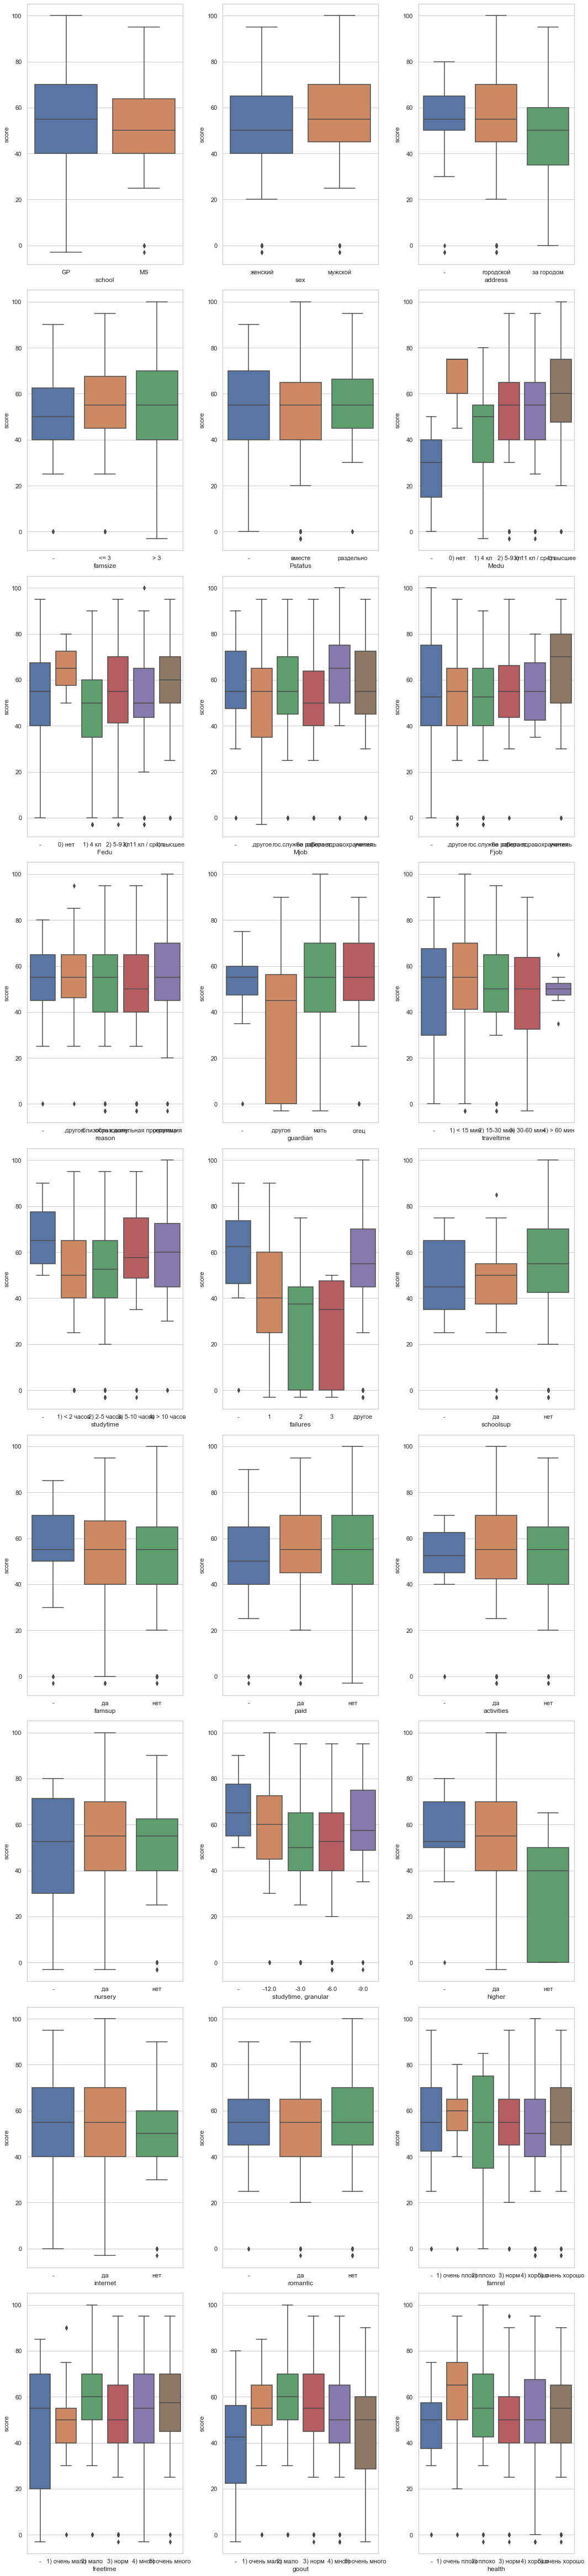

In [70]:
# Создадим функцию по созданию boxplot 
def boxplots(df):
  fig, axes = plt.subplots(9, 3, figsize = (15, 65))

  count = 0

  for column_name in df:
    if df[column_name].dtype == 'object':

      ax = axes[count // 3, count % 3]

      df = df.sort_values(by = [column_name])

      sns.boxplot(data = df, x = column_name, y = "score", ax = ax)

      count += 1
  fig.tight_layout() 
  fig.show()

boxplots(df)

# Глядя на boxplot можно выделить несколько параметров, влияющих на итоговый результат:

 sex, 
 address,
 age,
 Medu,
 Fedu,
 Mjob,
 schoolsup,
 higher,
 studytime,
 freetime,
 failures,
 goout,
 
как ни странно, согласно boxplot, дополнительные платные занятия по математике не сильно влияют на итоговый результат; ученики с очень плохим здоровьем сдают тесты лучше тех,  у кого здоровье хорошее; ученики путешествоваашие большее количество раз, сдают тесты хуже остальных; Fedu покахывает, что только у учителей дети учаться гораздо лучше других.

In [75]:
# создадим датафрейм с необходимыми нам для работы столбцами
output = df.loc[:, ['sex', 'address', 'age', 'Medu', 'Mjob', 'Fedu', 'higher', 'studytime', 'failures', 'schoolsup', 'freetime', 'goout', 'absences', 'score']]

In [76]:
display(output.head(10))
output.info()

,sex,address,age,Medu,Mjob,Fedu,higher,studytime,failures,schoolsup,freetime,goout,absences,score
270,женский,-,19,3) 11 кл / ср.сп.,.другое,3) 11 кл / ср.сп.,да,2) 2-5 часов,2,нет,3) норм,5) очень много,-3.0,-3.0
312,мужской,городской,19,1) 4 кл,.другое,2) 5-9 кл,да,2) 2-5 часов,1,нет,5) очень много,-,3.0,-3.0
201,женский,городской,16,2) 5-9 кл,.другое,3) 11 кл / ср.сп.,да,2) 2-5 часов,другое,да,-,3) норм,6.0,-3.0
283,женский,городской,18,1) 4 кл,.другое,1) 4 кл,да,2) 2-5 часов,другое,да,-,4) много,4.0,-3.0
244,женский,городской,18,2) 5-9 кл,.другое,1) 4 кл,да,3) 5-10 часов,другое,нет,4) много,4) много,0.0,-3.0
350,мужской,-,19,1) 4 кл,.другое,1) 4 кл,да,2) 2-5 часов,3,нет,4) много,4) много,8.0,-3.0
135,женский,городской,15,4) высшее,гос.служба,4) высшее,да,3) 5-10 часов,другое,нет,3) норм,3) норм,0.0,0.0
170,мужской,городской,16,3) 11 кл / ср.сп.,.другое,4) высшее,-,1) < 2 часов,-,нет,4) много,5) очень много,0.0,0.0
162,мужской,городской,16,1) 4 кл,.другое,2) 5-9 кл,да,1) < 2 часов,1,нет,4) много,4) много,0.0,0.0
239,мужской,городской,18,-,.другое,2) 5-9 кл,нет,2) 2-5 часов,1,нет,5) очень много,4) много,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 270 to 47
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        395 non-null    object 
 1   address    395 non-null    object 
 2   age        395 non-null    int64  
 3   Medu       395 non-null    object 
 4   Mjob       395 non-null    object 
 5   Fedu       395 non-null    object 
 6   higher     395 non-null    object 
 7   studytime  395 non-null    object 
 8   failures   395 non-null    object 
 9   schoolsup  395 non-null    object 
 10  freetime   395 non-null    object 
 11  goout      395 non-null    object 
 12  absences   395 non-null    float64
 13  score      395 non-null    float64
dtypes: float64(2), int64(1), object(11)
memory usage: 66.3+ KB


Выводы:
В исходном датафрейме данные частично не полные, в столбцах присутствуют пустые значения
количетсво числовых столбцов сократилось, так как информация в них скорее носит информационно-категориальные данные. В числовых столбцах есть выбросы.
Датафрейм содержит ошибочные (опечатки) значения.
Для дальнейшего построения модели предлагается сипользование следующих параметров: sex, address, age, Medu, Fedu, Mjob, schoolsup, higher, studytime, freetime, failures, goout, absences, score!

In [ ]:
# с программированием ранее не сталкивался, поэтому DS для меня что-то абсолютно новое. 
# многие моменты долго изучаю, пользуюсь СЛАК, смотрю как решают задачи другие студенты.
# проект интересный